# Open University Analysis
In this report, I will review student's demographic information and their interaction with the virtual learning environment (VLE) platform to determine eligibility for possible scholarships.

This information was derived from the Open University Learning Analytics dataset, which is a university in England.

Tableau visualization <br>
https://public.tableau.com/profile/yusuf.britton#!/vizhome/OpenUniversityVisual-Final/Dashboard1?publish=yes

Open University landing page<br>
http://www.open.ac.uk/

Kaggle dataset <br>
https://www.kaggle.com/rocki37/open-university-learning-analytics-dataset

## "Scholarship" opportunities
Based on the information available, here are some fictious scholarships that can be rewarded based on the student information:

>__Women's AAA empowerment scholarship:__ <br>
This award is available to women who are enrolled in a AAA course. 
 
>__Inclusion Outreach scholarship:__ <br>
This award is available to individuals who are in the Index of Multiple Deprivation (imd_band) of 30% or lower and have interacted with the VLE at least 100 times. 

>__Second Wind scholarship:__ <br>
This award is available to students who are disabled. 

Minimum student requirements for all scholarships:
- Enrolled in at least 60 credits.
- Final result of "pass" in all courses.
- Average score of 80 on all assessements.



## Data Schema and descriptions for dataframes
https://analyse.kmi.open.ac.uk/open_dataset#description

Dataframe descriptions used in this analysis:
- Students Assessments: student submissions and grades
- Student Info: Student demographic infomation (main dataframe)
- Student Registration: student registration status
- Student VLE: Student interation with VLE content


Files available, but omitted in analysis:
- Assessments: Exams, dates, and grading weights
- Courses: All available courses
- VLE: Material available in the course

## Exploratory Data Analysis
Using Python libraries to explore Open University data

In [1]:
"""Imports"""
#Standard libs for data analysis
import pandas as pd
import numpy as np

#Plot libraries to create charts
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [2]:
# Setting dataframes for student information
info_df = pd.read_csv('studentInfo.csv')
register_df = pd.read_csv('studentRegistration.csv')
assess_df = pd.read_csv('studentAssessment.csv')
vle_df = pd.read_csv('studentVle.csv')

### info_df
Looking through student demograpic information

In [3]:
# sample of dataframe
info_df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [4]:
# rows and columns
# 32K students, 12 different demographics
info_df.shape

(32593, 12)

Note: `imd_band` is missing some values. This may be missing data from data entry.

In [5]:
# looking at counts
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
code_module             32593 non-null object
code_presentation       32593 non-null object
id_student              32593 non-null int64
gender                  32593 non-null object
region                  32593 non-null object
highest_education       32593 non-null object
imd_band                31482 non-null object
age_band                32593 non-null object
num_of_prev_attempts    32593 non-null int64
studied_credits         32593 non-null int64
disability              32593 non-null object
final_result            32593 non-null object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


### Quantitative analysis

There seems to be an outlier in the `num_of_prev_attempts` field. Would look further.

In [6]:
# Getting a description of quantitative fields
info_df.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


### Qualitative Analysis
Taking a look at `gender`, `region`, `highest_education`, `imd_band`, `age_band`, `disability`, and `final_result`

In [7]:
# counts, by gender
info_df.gender.value_counts()

M    17875
F    14718
Name: gender, dtype: int64

In [8]:
# counts, by region
info_df.region.value_counts()

Scotland                3446
East Anglian Region     3340
London Region           3216
South Region            3092
North Western Region    2906
West Midlands Region    2582
South West Region       2436
East Midlands Region    2365
South East Region       2111
Wales                   2086
Yorkshire Region        2006
North Region            1823
Ireland                 1184
Name: region, dtype: int64

In [9]:
# counts, by education
info_df.highest_education.value_counts()

A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
Name: highest_education, dtype: int64

In [10]:
# counts, by age
info_df.age_band.value_counts()

0-35     22944
35-55     9433
55<=       216
Name: age_band, dtype: int64

In [11]:
# counts, by disability
info_df.disability.value_counts()

N    29429
Y     3164
Name: disability, dtype: int64

In [12]:
# counts, by result
info_df.final_result.value_counts()

Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64

### register_df
Depending on data, this may not be included in visualization if the *info_df* `final_result` can suffice

In [13]:
# sample
register_df.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


Can use `date_unregistration` to verify if student no longer in course

Based on description in https://analyse.kmi.open.ac.uk/open_dataset#description :

>date_registration – the date of student’s registration on the module presentation, this is the number of days measured relative to the start of the module-presentation (e.g. the negative value -30 means that the student registered to module presentation 30 days before it started).

>date_unregistration – date of student unregistration from the module presentation, this is the number of days measured relative to the start of the module-presentation. Students, who completed the course have this field empty. Students who unregistered have Withdrawal as the value of the final_result column in the studentInfo.csv file.

Based on `date_unregistration`, register_df is not necessary in visualization

### assess_df

In [14]:
# sample
assess_df.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [15]:
# 173K assignments submitted
assess_df.shape

(173912, 5)

__Student mean scores__: <br>
Looking at _assess.df_ average `score` by each `id_student`, we are able see how many students met the 80% average assessement score requirement.

In [16]:
# looking for student's mean scores. Below is a sample. 
# This returns a series (similar to one column in Excel)
grading_series = assess_df.groupby('id_student')['score'].mean()
grading_series.head(10)

id_student
6516     61.800000
8462     87.000000
11391    82.000000
23629    82.500000
23698    74.444444
23798    93.909091
24186    62.500000
24213    76.285714
24391    88.888889
24734    46.800000
Name: score, dtype: float64

In [17]:
# Creating dataframe to hold series
grading_df = pd.DataFrame(grading_series)

In [18]:
# Series to determine if a student qualifies for 
grading_df['isReqMet'] = grading_df['score'] > 80.0

In [19]:
# viewing counts
grading_df.isReqMet.value_counts()

False    14542
True      8827
Name: isReqMet, dtype: int64

In [20]:
grading_df.head()

,score,isReqMet
id_student,,
6516,61.800000,False
8462,87.000000,True
11391,82.000000,True
23629,82.500000,True
23698,74.444444,False


In [21]:
#Saving DF as an csv file to be used in visual
grading_df.to_csv('grading_df.csv')

In [22]:
# saving counts for pie chart
false_counts = grading_df.isReqMet.value_counts()[False]
true_counts = grading_df.isReqMet.value_counts()[True]

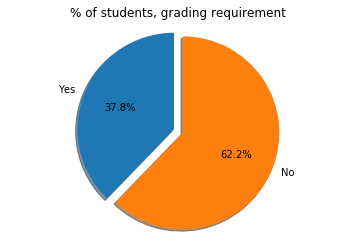

In [23]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# Data
labels = 'Yes', 'No'
sizes = [true_counts, false_counts]
explode = (0.1, 0.0)  # only "explode" the true values

# Fitting data into pie chart
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Aesthetics
plt.title('% of students, grading requirement')

plt.show()

### vle_df

In [24]:
vle_df.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [25]:
# 10.6 million interactions with the platform
vle_df.shape

(10655280, 6)

In [26]:
platform_series = vle_df.id_student.value_counts()
platform_series.head()

537811     6389
2088765    5240
298040     4978
630905     4916
2063578    4518
Name: id_student, dtype: int64

In [27]:
# viewing how many times student interacted with platform
platform_series.describe()

count    26074.000000
mean       408.655365
std        430.608121
min          1.000000
25%        108.000000
50%        270.000000
75%        570.000000
max       6389.000000
Name: id_student, dtype: float64

In [28]:
#Saving DF as an csv file to be used in visual
platform_series.to_csv('platform_series.csv', index_label = 'id_student', header = ['interactions'])

## Data observations

info_df:
- There seems to be an outlier in the num_of_prev_attempts field.
- `imd_band` is missing some values.



## Conclusion

__Analysis Notes__<br>
There is missing information in regards to the `imd_band`. Also, there are outliers in the `num_of_prev_attempts`.

This missing data could be human error. If needed, can attempt to retrieve missing data.

__Tableau notes__ <br>
Scholarships: <br>
Currently, visual is set up to only account for three scholarships. It has the logic to detect if a student can meet multiple scholarships. For example, a female student who is enrolled in the AAA course and is in the 10% income bracket qualifies for both the Women's AAA and Inclusion scholarships and will show on the dashboard as such. Dashboard could be built to scale for multiple scholarships.

This visualization could be used if a company:
- is using a NoSQL server, which can store variables in a list that can be applied to multiple scholarships.
- scholarship algorithm can produce a list of scholarships that students qualify for.

Further notes
Looking for students that are close to qualifying
In data collection, be aware of retrieving demographic information. Be careful about sensitive data, but use proxies to match students to scholarships. Look over laws in regards to collecting data about race and other stuff.

## Citation

Kuzilek J., Hlosta M., Zdrahal Z. Open University Learning Analytics dataset Sci. Data 4:170171 doi: 10.1038/sdata.2017.171 (2017).
https://www.nature.com/articles/sdata2017171

Index of Multiple Deprivation (IMD)
https://factsandfigures.herefordshire.gov.uk/about-a-topic/inequalities-and-deprivation/index-of-multiple-deprivation.aspx